In [98]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import umap
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [13]:
#loading in the doc-topic matrix from the TF-IDF + NMF model that gave me the best topics
with open('nmf_tfidf_doc_topic.pkl', 'rb') as handle:
    df = pickle.load(handle)

In [92]:
df.head(5)

,General,Initial Stories,People testing positive,Trumps Response to Covid-19,Italy Covid-19 Outbreak,Stopping the spread,United States Covid-19 outbreak,Coronavirus growing in China,Anger,Covid-19 cancellations,Working from home,Cruise and Quarantines,Wearing a mask,White House Briefings,Second Wave Warnings,date
text,,,,,,,,,,,,,,,,
watch this space wuhan is a coronavirus like sars,0.00195,0.00078,0.0000,0.00002,0.00000,0.00000,0.0,0.08278,0.00000,0.0,0.0,0.0,0.0,0.00443,0.00145,2020-01-12 23:55:37
todos mis tweets lo son,0.00319,0.00000,0.0023,0.00079,0.00000,0.00000,0.0,0.00000,0.00077,0.0,0.0,0.0,0.0,0.00000,0.00017,2020-01-12 23:45:28
china s mystery coronavirus isn t currently spreading health organization says cbc news,0.00000,0.04928,0.0000,0.00000,0.00000,0.06229,0.0,0.00469,0.00000,0.0,0.0,0.0,0.0,0.00000,0.00000,2020-01-12 23:43:54
china s mystery coronavirus isn t currently spreading who says,0.00000,0.05579,0.0000,0.00000,0.00000,0.07233,0.0,0.00500,0.00000,0.0,0.0,0.0,0.0,0.00000,0.00000,2020-01-12 23:38:30
dead diagnosed with coronavirus related pneumonia in wuhan health,0.00000,0.00000,0.0000,0.00000,0.00089,0.00000,0.0,0.08384,0.00000,0.0,0.0,0.0,0.0,0.00000,0.00000,2020-01-12 23:35:09


In [26]:
#splitting the data up per month
df.date = pd.to_datetime(df.date)
dec_df = df[df.date.apply(lambda x: x.month==12)]
jan_df = df[df.date.apply(lambda x: x.month==1)]
feb_df = df[df.date.apply(lambda x: x.month==2)]
mar_df = df[df.date.apply(lambda x: x.month==3)]
apr_df = df[df.date.apply(lambda x: x.month==4)]
may_df = df[df.date.apply(lambda x: x.month==5)]

In [39]:
#setting up a new data frame where I'll collect the relative importance values for each topic per month
months = [['December',dec_df], ['January', jan_df], ['February', feb_df], ['March', mar_df],
          ['April', apr_df], ['May', may_df]]

monthly_topics = pd.DataFrame(0,index=[month[0] for month in months], columns=df.drop('date',axis=1).columns)

In [126]:
#for each month dataframe, I go in and sum up each topic column to get the "importance" of each topic per month.
#then I put each value in the newly created monthly_topics dataframe

for month in months:
    for column in month[1].columns:
        if column != 'date':
            monthly_topics.at[month[0], column] = float(month[1][column].sum())

In [ ]:
monthly_topics.rename(columns={"Initial Stories": "Initial Chinese Outbreak"},inplace=True)

In [108]:
monthly_topics

,General,Initial Chinese Outbreak,People testing positive,Trumps Response to Covid-19,Italy Covid-19 Outbreak,Stopping the spread,United States Covid-19 outbreak,Coronavirus growing in China,Anger,Covid-19 cancellations,Working from home,Cruise and Quarantines,Wearing a mask,White House Briefings,Second Wave Warnings
December,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
January,9,50,4,2,19,13,5,73,3,2,3,4,3,1,6
February,82,153,40,34,70,86,40,78,20,82,30,58,38,20,53
March,103,22,75,96,29,43,40,19,42,50,40,46,28,49,45
April,104,29,55,103,36,41,57,23,21,27,49,33,45,68,43
May,101,26,56,83,45,36,63,21,16,26,40,26,40,77,35


In [114]:
#normalizing the data
try_this = (100. * monthly_topics / monthly_topics.sum()).round(0)
try_this

,General,Initial Chinese Outbreak,People testing positive,Trumps Response to Covid-19,Italy Covid-19 Outbreak,Stopping the spread,United States Covid-19 outbreak,Coronavirus growing in China,Anger,Covid-19 cancellations,Working from home,Cruise and Quarantines,Wearing a mask,White House Briefings,Second Wave Warnings
December,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
January,2.0,18.0,2.0,1.0,10.0,6.0,2.0,34.0,3.0,1.0,2.0,2.0,2.0,0.0,3.0
February,20.0,55.0,17.0,11.0,35.0,39.0,20.0,36.0,20.0,44.0,19.0,35.0,25.0,9.0,29.0
March,26.0,8.0,33.0,30.0,15.0,20.0,20.0,9.0,41.0,27.0,25.0,28.0,18.0,23.0,25.0
April,26.0,10.0,24.0,32.0,18.0,19.0,28.0,11.0,21.0,14.0,30.0,20.0,29.0,32.0,24.0
May,25.0,9.0,24.0,26.0,23.0,16.0,31.0,10.0,16.0,14.0,25.0,16.0,26.0,36.0,19.0


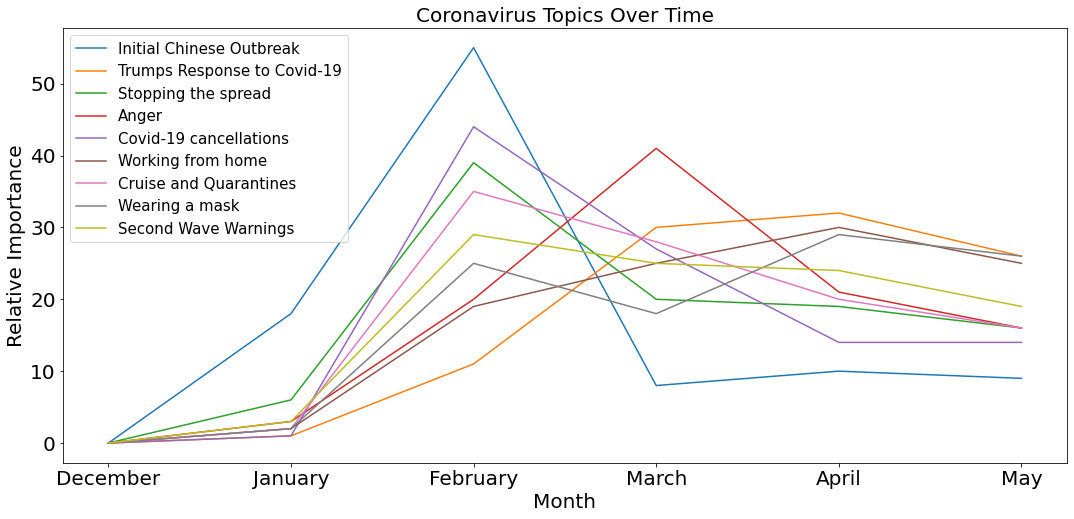

In [116]:
#plotting the curve:
x= monthly_topics.index
small_df = try_this.drop(['General', 'People testing positive', 'Coronavirus growing in China',
                               'White House Briefings', 'United States Covid-19 outbreak', 'Italy Covid-19 Outbreak'
                               ], axis=1)
plt.figure(figsize=(18,8))
for topic in small_df.columns:
    plt.plot(x,small_df[topic], label = topic)


plt.xlabel('Month', fontsize = 20)
plt.tick_params(labelsize = 20)
plt.ylabel('Relative Importance', fontsize = 20)
plt.title('Coronavirus Topics Over Time', fontsize = 20)
plt.legend(fontsize = 15)
plt.savefig('topics_over_time.png',format='png', bbox_inches = 'tight')
plt.show()


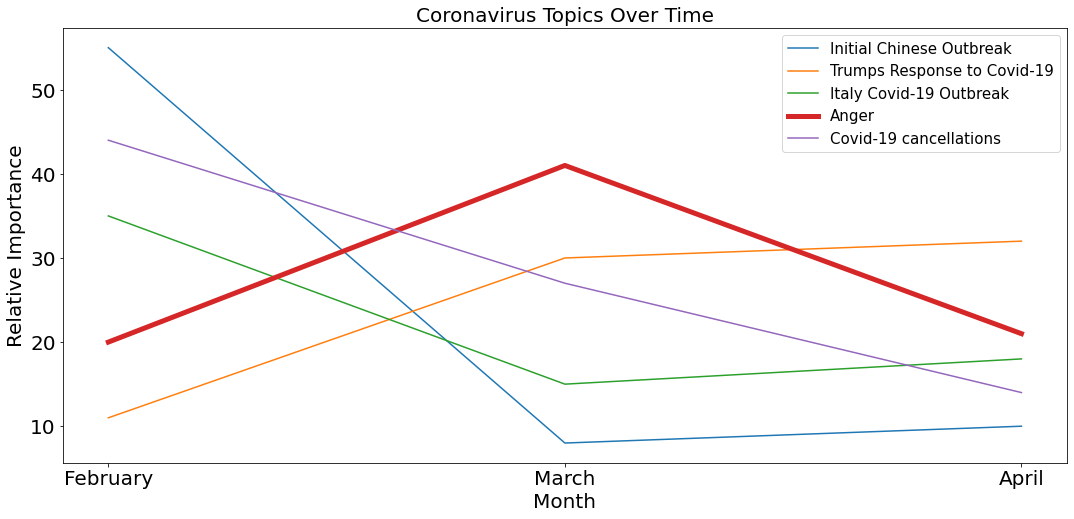

In [117]:
#plotting the curve for just Feb/Mar/April:
x= ['February', 'March', 'April']
small_df = try_this.drop(['General', 'People testing positive', 'Coronavirus growing in China',
                               'White House Briefings', 'United States Covid-19 outbreak', 'Stopping the spread'
                                , 'Working from home', 'Cruise and Quarantines',
                                'Second Wave Warnings', 'Wearing a mask'
                               ], axis=1)
plt.figure(figsize=(18,8))
for topic in small_df.columns:
    if topic == 'Anger':
        plt.plot(x,small_df[topic].iloc[2:5], label = topic,linewidth=5)
    else:
         plt.plot(x,small_df[topic].iloc[2:5], label = topic)


plt.xlabel('Month', fontsize = 20)
plt.tick_params(labelsize = 20)
plt.ylabel('Relative Importance', fontsize = 20)
plt.title('Coronavirus Topics Over Time', fontsize = 20)
plt.legend(fontsize = 15)
plt.savefig('feb_mar_apri_topics.png',format='png', bbox_inches = 'tight')
plt.show()


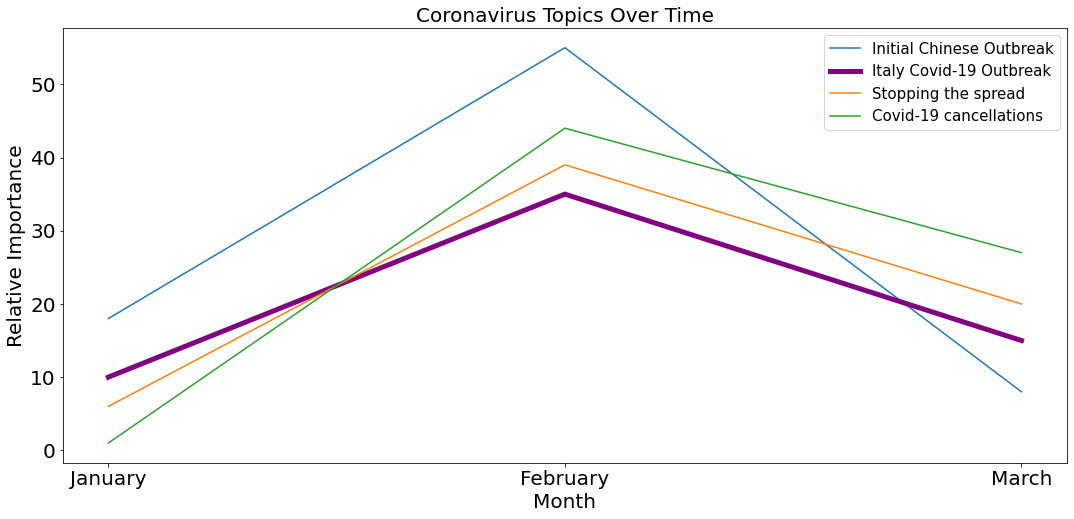

In [118]:
#plotting the curve for just Jan/Feb/Mar:
x= ['January', 'February', 'March']
small_df = try_this.drop(['General',
                               'White House Briefings', 'United States Covid-19 outbreak'
                                , 'Working from home', 'Cruise and Quarantines', 'Anger','Coronavirus growing in China',
                                'Second Wave Warnings', 'Wearing a mask', 'Trumps Response to Covid-19', 'People testing positive'
                               ], axis=1)
plt.figure(figsize=(18,8))
for topic in small_df.columns:
    if topic == 'Italy Covid-19 Outbreak':
        plt.plot(x,small_df[topic].iloc[1:4], label = topic,linewidth=5, c='purple')
    else:
         plt.plot(x,small_df[topic].iloc[1:4], label = topic)


plt.xlabel('Month', fontsize = 20)
plt.tick_params(labelsize = 20)
plt.ylabel('Relative Importance', fontsize = 20)
plt.title('Coronavirus Topics Over Time', fontsize = 20)
plt.legend(fontsize = 15)
plt.savefig('jan_feb_mar_topics.png',format='png', bbox_inches = 'tight')
plt.show()

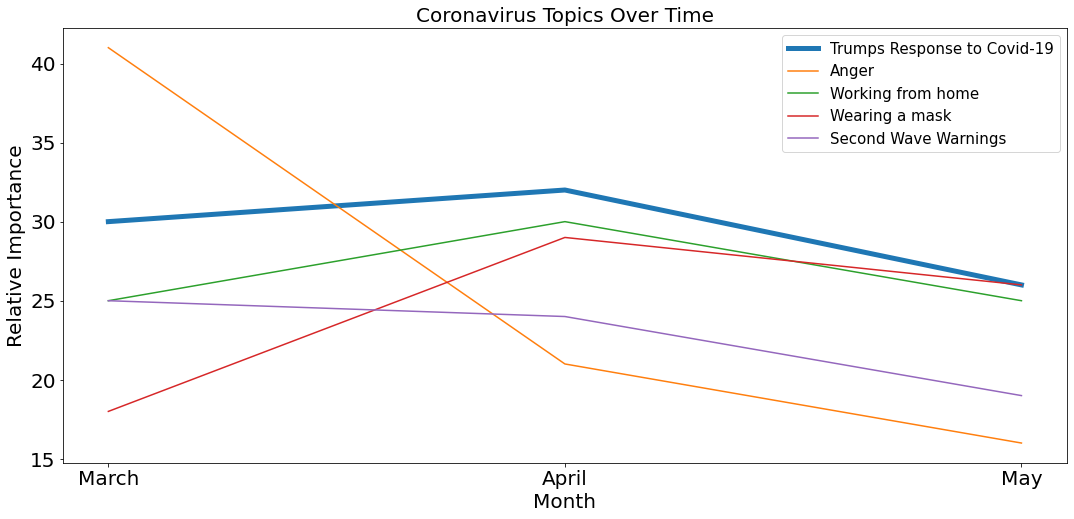

In [125]:
#plotting the curve for just Mar/April/May:
x= ['March', 'April', 'May']
small_df = try_this.drop(['General', 'People testing positive', 'Coronavirus growing in China',
                               'White House Briefings', 'United States Covid-19 outbreak', 'Stopping the spread',
                          'Initial Chinese Outbreak', 'Covid-19 cancellations', 'Italy Covid-19 Outbreak', 'Cruise and Quarantines'
                               ], axis=1)
plt.figure(figsize=(18,8))
for topic in small_df.columns:
    if topic == 'Trumps Response to Covid-19':
        plt.plot(x,small_df[topic].iloc[3:6], label = topic,linewidth=5)
    else:
         plt.plot(x,small_df[topic].iloc[3:6], label = topic)


plt.xlabel('Month', fontsize = 20)
plt.tick_params(labelsize = 20)
plt.ylabel('Relative Importance', fontsize = 20)
plt.title('Coronavirus Topics Over Time', fontsize = 20)
plt.legend(fontsize = 15)
plt.savefig('mar_apri_may_topics.png',format='png', bbox_inches = 'tight')
plt.show()
